In [1]:
import numpy as np
import cv2
from skimage.measure import label, regionprops

In [20]:
import h5py
import tensorflow as tf

with h5py.File(r"W:\real_world_sample01.pre", 'r') as file:
    dataset = file['phase']['images'] #Creates a dataset with the phase images
    image_tensor = np.array(dataset[0]) #Converts only the first element to an array (FOR TESTING ONLY)
    image_int8 = image_tensor.astype(np.uint8) #Converts the array to UINT8 type for CV processing
    _, binary_image = cv2.threshold(image_int8, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU) #Creates a binary image from the data

    
    labeled_image = label(binary_image) #Changes all values closed together to be part of the same cluster
    regions = regionprops(labeled_image) #Extracts the relevant information from the cells, including the bounding box
    all_cells = []
    for region in regions: #Loops through id'd regions, crops them from original and add them to list
        minr, minc, maxr, maxc = region.bbox
        cell_image = image_tensor[minr:maxr, minc:maxc]
        cell_tf = tf.convert_to_tensor(cell_image)
        cell_conv = tf.expand_dims(cell_tf, axis=2)
        cell_resized = tf.image.resize_with_pad(cell_conv, 52, 52)
        all_cells.append(cell_resized)



(17, 20, 1)
(15, 20, 1)
(15, 20, 1)
(20, 19, 1)
(18, 22, 1)
(19, 19, 1)


In [3]:
for region in regions:
    print(f"Label: {region.label}")
    print(f"Area: {region.area}")
    print(f"Centroid: {region.centroid}")
    print(f"Bbox: {region.bbox}")
    print(f"Eccentricity: {region.eccentricity}")
    print("----------")

Label: 1
Area: 248.0
Centroid: (45.23790322580645, 209.36693548387098)
Bbox: (37, 200, 54, 220)
Eccentricity: 0.5497786455823023
----------
Label: 2
Area: 234.0
Centroid: (56.504273504273506, 341.2350427350427)
Bbox: (50, 332, 65, 352)
Eccentricity: 0.6713910932165735
----------
Label: 3
Area: 229.0
Centroid: (87.8646288209607, 142.3711790393013)
Bbox: (81, 133, 96, 153)
Eccentricity: 0.706851578242051
----------
Label: 4
Area: 281.0
Centroid: (305.4270462633452, 214.7081850533808)
Bbox: (295, 206, 315, 225)
Eccentricity: 0.44243735436848575
----------
Label: 5
Area: 305.0
Centroid: (329.3311475409836, 323.10819672131146)
Bbox: (320, 313, 338, 335)
Eccentricity: 0.5638029077097435
----------
Label: 6
Area: 259.0
Centroid: (363.7644787644788, 204.3166023166023)
Bbox: (354, 195, 373, 214)
Eccentricity: 0.685365809797975
----------


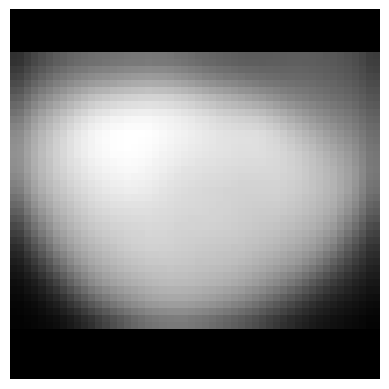

In [23]:
import matplotlib.pyplot as plt
plt.imshow(all_cells[1], cmap='gray')  # 'gray' colormap for grayscale images
plt.axis('off')  # Hide the axis ticks and labels
plt.show()

In [24]:
hf = h5py.File('individual_cells.h5', 'w')
hf.create_dataset('Individual Cells', data=all_cells)
hf.close()

In [25]:
import os 
def read_hdf5(file_path):
    os.environ["HDF5_USE_FILE_LOCKING"] = "FALSE"
    hf = h5py.File(file_path, 'r')
    print(hf.keys())
    return hf

In [28]:
fpath = r'C:\Users\hecto\Python VS Code\individual_cells.h5'
hf_pred = read_hdf5(fpath)

def h5printR(item, leading = ''):
    for key in item:
        if isinstance(item[key], h5py.Dataset):
            print(leading + key + ': ' + str(item[key].shape))
        else:
            print(leading + key)
            h5printR(item[key], leading + '  ')

# Print structure of a `.h5` file            
def h5print(filename):
    with h5py.File(filename, 'r') as h:
        print(filename)
        h5printR(h, '  ')

h5print(fpath)

<KeysViewHDF5 ['Individual Cells']>
C:\Users\hecto\Python VS Code\individual_cells.h5
  Individual Cells: (6, 52, 52, 1)
